# 以深度學習預測數位廣告點擊率（Click-Through-Rate, CTR)

<img src="https://media.discordapp.net/attachments/1111830487376334848/1130792312298016799/sher3357_digital_world_digital_information_digital_advertising__a475f711-5f1d-4c27-9627-6eea7d31ea7d.png?width=1209&height=137">

## 研究背景和動機
點擊率預測在任何推薦系統和數位廣告中都扮演著關鍵的角色。預測點擊率能夠幫助廣告主優化資金的配置，從而提高投資報酬。

## 研究目標
  <li>分析不同投放未知等因素對廣告點擊率的影響</li>
  <li>建立點擊率預測模型</li>
  
## 研究方法
  一般的機器學習方法在學習用戶行為背後的複雜特徵交互方面存在限制，對低階或高階交互(low order or high order intersection) 存在偏差，並且需要複雜的特徵工程來處理。相反地，DeepFM提出了一種結合了因子分解機（factorization machines）和深度神經網絡優勢的新型神經網絡架構。<br>

## 資料
資料使用Kaggle的Click-Through Rate Prediction資料集

## 數據特徵解釋
本次使用的數據集一共包含24個特徵，各特徵所代表的含義如下：<br>
<li>id : personal_id</li>
<li>click : target</li>
<li>hour : format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.</li>
<li>C1 : anonymized categorical variable</li>
<li>banner_pos : showing banner</li>
<li>site domain</li>
<li>site_category</li>
<li>app_id</li>
<li>add_category</li>
<li>device_id</li>
<li>device_ip</li>
<li>device_model</li>
<li>device_type</li>
<li>device_conn_type</li>
<li>C14 ~ C21 : anonymized categorical variables</li>
  


## 關於DeepFM
DeepFM（Deep Factorization Machine）是一種結合了因子分解機（Factorization Machine）和深度神經網絡（Deep Neural Network）的混合模型，用於處理推薦系統和廣告預測等機器學習任務。

DeepFM 模型的核心思想是同時利用因子分解機和深度神經網絡進行特徵表徵和特徵交互的學習，從而更好地捕捉特徵之間的非線性關係。該模型結合了兩種不同的組件：

<ul>
1.因子分解機（Factorization Machine）：因子分解機是一種廣義線性模型的擴展，通過對特徵進行二階交互（即考慮兩個特徵之間的交互作用）來建模特徵之間的相互關係。因子分解機可以有效地處理稀疏特徵和高維特徵，並能夠學習特徵的隱含因子表示。
</ul>
<ul>
2. 深度神經網絡（Deep Neural Network）：深度神經網絡是一種多層次的神經網絡模型，通過多個隱藏層和非線性激活函數來進行特徵表徵和特徵交互的學習。深度神經網絡可以捕捉更複雜的特徵關係，並具有強大的建模能力。
</ul>
在 DeepFM 模型中，因子分解機部分用於學習特徵的低階交互，而深度神經網絡部分用於學習特徵的高階交互。通過將兩部分的輸出相加，最終得到模型的預測結果。

### DeepFM 模型具有以下特點和優勢：
<li>能夠捕捉特徵交互的非線性關係：因子分解機和深度神經網絡的結合，使得模型能夠同時進行低階和高階特徵交互的學習，從而更好地捕捉特徵之間的非線性關係。</li>

<li>適用於稀疏和高維特徵：DeepFM 模型能夠有效地處理稀疏特徵和高維特徵，這在推薦系統和廣告預測等場景中非常常見。</li>

<li>模型訓練效果較好：深度神經網絡的加入使得 DeepFM 模型具有較強的表達能力和建模能力，能夠在大型數據集上獲得良好的訓練效果。</li>

結來說，DeepFM 是一種結合了因子分解機和深度神經網絡的混合模型，用於處理推薦系統和廣告預測等機器學習任務。它的設計使得模型能夠同時捕捉特徵的低階和高階交互，並具有適應稀疏和高維特徵的能力，進而提升預測性能。
  
### DeepFM結構
<img src="https://www.researchgate.net/profile/Denis-Parra/publication/333072035/figure/fig8/AS:800143024603149@1567780371635/Example-of-the-DeepFM-Architecture-Image-adapted-from-3.ppm" width=800 height=6000>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import gc

plt.style.use('ggplot')

import warnings as w
w.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)

### 轉化資料到正確的類型
### 訓練資料集相當龐大，對資料做Sample

In [2]:
dtype={'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.str,
    'C1': np.dtype(str),
    'banner_pos': np.dtype(str),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(str),
    'device_conn_type': np.dtype(str),
    'C14': np.dtype(str),
    'C15': np.dtype(str),
    'C16': np.dtype(str),
    'C17': np.dtype(str),
    'C18': np.dtype(str),
    'C19': np.dtype(str),
    'C20': np.dtype(str),
    'C21':np.dtype(str)
      }
num_records = 40428967
sample_size = 5000000
skip_values = sorted(random.sample(range(1,num_records), num_records - sample_size))
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

In [3]:
train = pd.read_csv("../input/avazu-ctr-prediction/train.gz", parse_dates=['hour'], date_parser=parse_date, dtype=dtype, skiprows=skip_values)
test = pd.read_csv('../input/avazu-ctr-prediction/test.gz')
submission = pd.read_csv('../input/avazu-ctr-prediction/sampleSubmission.gz')
print('Train dataset:',train.shape)
print('Test dataset:',test.shape)
print('Submission:',submission.shape)

Train dataset: (5000000, 24)
Test dataset: (4577464, 23)
Submission: (4577464, 2)


### 檢視訓練和測試集的前5行

In [4]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000371904215119486,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
1,10000720757801103869,0,2014-10-21,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,05241af0,8a4875bd,1,0,16920,320,50,1899,0,431,100077,117
2,10001264480619467364,0,2014-10-21,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,c357dbff,f1ac7184,373ecbe6,0,0,21689,320,50,2496,3,167,100191,23
3,10003539039235338011,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a4f47b2e,8a4875bd,1,0,15699,320,50,1722,0,35,100084,79
4,10004181428767727519,0,2014-10-21,1005,1,0c2fe9d6,27e3c518,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b7a69808,158e4944,1,0,6558,320,50,571,2,39,-1,32


In [5]:
test.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000017e+19,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,69f45779,0eb711ec,1,0,8330,320,50,761,3,175,100075,23
1,1.000018e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8d44657,ecb851b2,1,0,22676,320,50,2616,0,35,100083,51
2,1.000055e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,10fb085b,1f0bc64f,1,0,22676,320,50,2616,0,35,100083,51
3,1.000109e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,a99f214a,422d257a,542422a7,1,0,18648,320,50,1092,3,809,100156,61
4,1.000138e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,a99f214a,078c6b38,1f0bc64f,1,0,23160,320,50,2667,0,47,-1,221


### 檢查缺失值
無缺失值

In [6]:
train.isna().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

### 查看預測目標（點擊）的資料分佈
0為沒有點擊，1為有點擊<br>
廣告點擊的分佈並不平衡。

0    4151607
1     848393
Name: click, dtype: int64


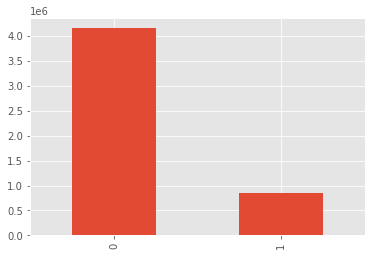

In [7]:
train.click.value_counts().plot(kind='bar')
print(train.click.value_counts())

### 檢視廣告排名的分佈
排名高的廣告有較高機會被用戶看到，因此可能會影響點擊率。<br>
大多數的廣告排名都在第一位。

In [8]:
train.banner_pos.value_counts()

0    3599809
1    1391234
7       5458
2       1642
4        953
5        651
3        253
Name: banner_pos, dtype: int64

### 廣告排名和點擊率
圖表顯示排名和點擊率並沒有正向關係。

<AxesSubplot:xlabel='banner_pos', ylabel='count'>

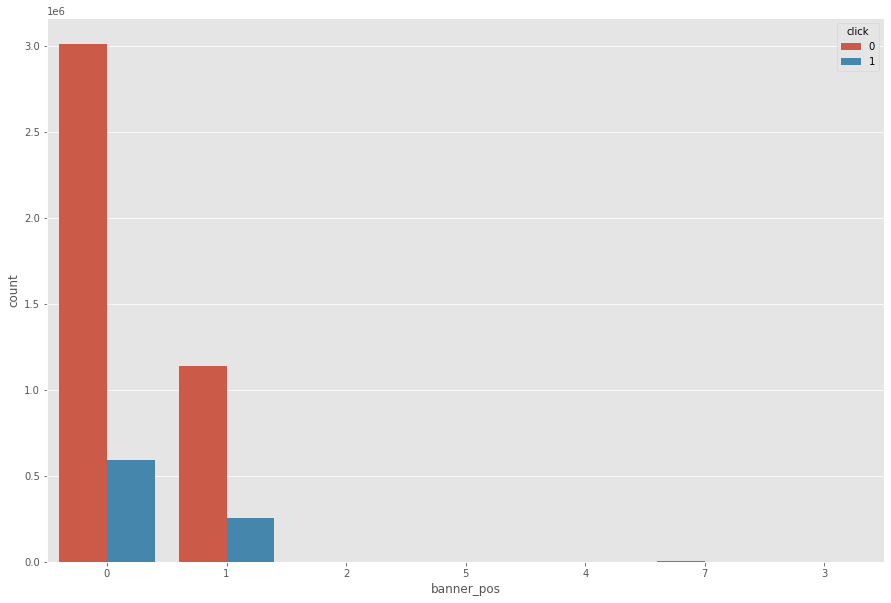

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x='banner_pos',hue='click',data=train)

### 檢視點擊和時間的關係

<AxesSubplot:xlabel='hour', ylabel='count'>

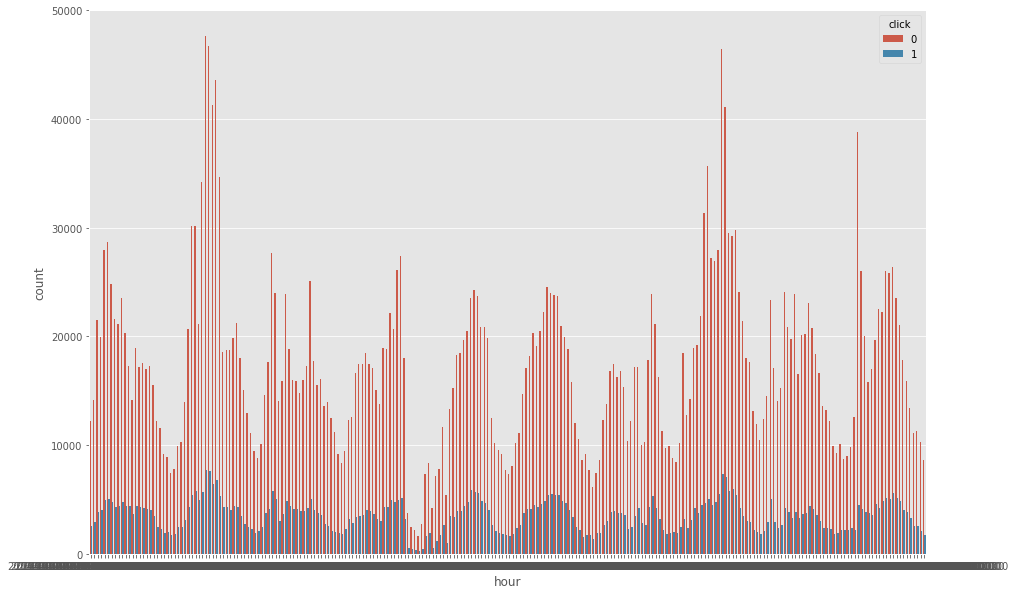

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(x='hour',hue='click',data=train)

### 點擊數與小時分析
擷取一天的資料，檢視點擊數是否因時間而改變。

發現點擊依時間推移有一些波動。

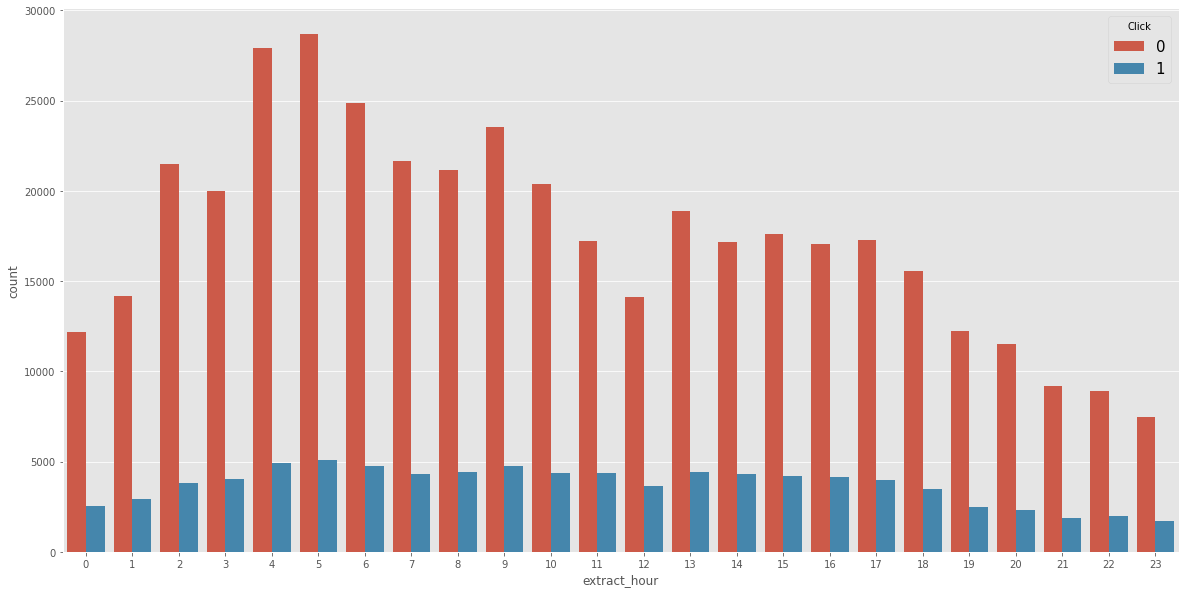

In [11]:
ex_data = train[train['hour'] < '2014-10-22']
ex_data['extract_hour'] = ex_data['hour'].dt.hour
plt.figure(figsize=(20, 10))
sns.countplot(x='extract_hour',hue='click',data=ex_data)
plt.legend(title='Click', loc='upper right', prop={'size': 15})
plt.show()

In [12]:
train.set_index('hour',inplace=True)

In [13]:
test.set_index('hour',inplace=True)

### 稀疏特徵
 * C1
 * banner_pos
 * site_id
 * site_domain
 * site_category
 * app_id
 * app_domain
 * app_category
 * device_id
 * device_ip
 * device_model
 * device_type
 * device_conn_type

### 密集特徵
 * C14 ~ c21

In [39]:
!pip install deepctr_torch

## 進行數據預處理並設定特徵列(feature columns)以供機器學習模型使用

In [18]:
import torch
from deepctr_torch.inputs import SparseFeat, DenseFeat, get_feature_names
from deepctr_torch.models import *

In [19]:
data = train

In [20]:
sparse_features = train.iloc[::,2:14].columns.values.tolist()
dense_features = train.iloc[::,15:].columns.values.tolist()
sparse_features.append('id')
target = ['click']

In [21]:
test.head()

,id,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
hour,,,,,,,,,,,,,,,,,,,,,,
14103100,1.000017e+19,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,69f45779,0eb711ec,1,0,8330,320,50,761,3,175,100075,23
14103100,1.000018e+19,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8d44657,ecb851b2,1,0,22676,320,50,2616,0,35,100083,51
14103100,1.000055e+19,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,10fb085b,1f0bc64f,1,0,22676,320,50,2616,0,35,100083,51
14103100,1.000109e+19,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,a99f214a,422d257a,542422a7,1,0,18648,320,50,1092,3,809,100156,61
14103100,1.000138e+19,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,a99f214a,078c6b38,1f0bc64f,1,0,23160,320,50,2667,0,47,-1,221


## 指定稀疏特徵和密集特徵

In [22]:
test_sparse_features = test.iloc[::,0:14].columns.values.tolist()
test_dense_features = test.iloc[::,14:].columns.values.tolist()

In [23]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
scaler = MinMaxScaler(feature_range=(0,1))
encoder = LabelEncoder()

In [24]:
for f in sparse_features:
    data[f] = encoder.fit_transform(data[f])
data[dense_features] = scaler.fit_transform(data[dense_features])

In [25]:
for f in test_sparse_features:
    test[f] = encoder.fit_transform(test[f])
test[dense_features] = scaler.fit_transform(test[test_dense_features])

### 根據稀疏特徵和密集特徵的特點，建構出一組特徵列
- 對於稀疏特徵，使用 SparseFeat(f, data[f].nunique()) 建立一個稀疏特徵列，其中 f 是特徵名稱
- 對於密集特徵，使用 DenseFeat(f, 1) 建立一個密集特徵列

這些特徵列將用於後續的機器學習模型建構，以描述模型應該如何處理不同類型的特徵。稀疏特徵列和密集特徵列將一起作為模型的輸入特徵。

In [26]:
fixlen_feature_columns = [SparseFeat(f,data[f].nunique()) 
                          for f in sparse_features] + [DenseFeat(f,1,)
                                                         for f in dense_features]

In [27]:
fixlen_feature_columns[1]

SparseFeat(name='banner_pos', vocabulary_size=7, embedding_dim=4, use_hash=False, dtype='int32', embedding_name='banner_pos', group_name='default_group')

## 定義深度神經網路（DNN）模型和線性模型的特徵列，並獲取所有特徵的名稱。

In [28]:
dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

In [29]:
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)
feature_names

['C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'id',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [30]:
train_model_input = {name: data[name]for name in feature_names}

In [31]:
test_model_input = {name: test[name] for name in feature_names}

檢查是否支援CUDA，即 GPU 加速。若有，就用GPU

In [32]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

## 建立模型
- linear_feature_columns 和 dnn_feature_columns 是先前定義的特徵列列表，用於描述模型的輸入特徵。linear_feature_columns 描述了模型的線性部分所使用的特徵，而 dnn_feature_columns 描述了模型的深度學習部分所使用的特徵。
- dnn_dropout=0.7 表示在深度學習部分的網絡中使用 0.7 的 dropout 比例，用於防止過擬合。

In [33]:
model = DeepFM(linear_feature_columns,dnn_feature_columns,
               task='binary',device=device,dnn_dropout=0.7)
model

DeepFM(
  (embedding_dict): ModuleDict(
    (C1): Embedding(7, 4)
    (banner_pos): Embedding(7, 4)
    (site_id): Embedding(3580, 4)
    (site_domain): Embedding(4547, 4)
    (site_category): Embedding(24, 4)
    (app_id): Embedding(5147, 4)
    (app_domain): Embedding(317, 4)
    (app_category): Embedding(28, 4)
    (device_id): Embedding(599395, 4)
    (device_ip): Embedding(1905679, 4)
    (device_model): Embedding(6561, 4)
    (device_type): Embedding(5, 4)
    (id): Embedding(5000000, 4)
  )
  (linear_model): Linear(
    (embedding_dict): ModuleDict(
      (C1): Embedding(7, 1)
      (banner_pos): Embedding(7, 1)
      (site_id): Embedding(3580, 1)
      (site_domain): Embedding(4547, 1)
      (site_category): Embedding(24, 1)
      (app_id): Embedding(5147, 1)
      (app_domain): Embedding(317, 1)
      (app_category): Embedding(28, 1)
      (device_id): Embedding(599395, 1)
      (device_ip): Embedding(1905679, 1)
      (device_model): Embedding(6561, 1)
      (device_type): Em

## 設定模型的優化器、損失函數和評估指標
- optimizer='adam'：選擇 Adam 優化器來調整模型的權重，這是一種廣泛使用的梯度下降優化算法。
- loss='binary_crossentropy'：設置二元分類問題中的損失函數為二元交叉熵（binary cross-entropy），用於衡量模型預測結果與實際標籤之間的差異。
- metrics=['binary_crossentropy', 'auc']：指定模型的評估指標，這裡設置為二元交叉熵和 AUC（Area Under the Curve）。二元交叉熵用於衡量模型在測試集上的表現，而 AUC 是評估二元分類模型預測結果優劣的指標，代表了模型的分類能力。

In [34]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['binary_crossentropy','auc'])

## 訓練模型
使用批次大小為 1024、訓練 10 輪（epochs）、並將訓練集的 20% 作為驗證集

In [35]:
%%time
history = model.fit(train_model_input, train[target].values, batch_size=1024, epochs=10, verbose=1,
                        validation_split=0.2)

cuda
Train on 4000000 samples, validate on 1000000 samples, 3907 steps per epoch


3907it [02:14, 29.04it/s]


Epoch 1/10
143s - loss:  0.4049 - binary_crossentropy:  0.4048 - auc:  0.7366 - val_binary_crossentropy:  0.3931 - val_auc:  0.7387


3907it [02:18, 28.25it/s]


Epoch 2/10
147s - loss:  0.0176 - binary_crossentropy:  0.0173 - auc:  0.9972 - val_binary_crossentropy:  0.5336 - val_auc:  0.7127


3907it [02:15, 28.80it/s]


Epoch 3/10
144s - loss:  0.0004 - binary_crossentropy:  0.0002 - auc:  1.0000 - val_binary_crossentropy:  0.6610 - val_auc:  0.6827


3907it [02:14, 29.15it/s]


Epoch 4/10
142s - loss:  0.0168 - binary_crossentropy:  0.0167 - auc:  0.9990 - val_binary_crossentropy:  0.5317 - val_auc:  0.7108


3907it [02:14, 29.15it/s]


Epoch 5/10
142s - loss:  0.1203 - binary_crossentropy:  0.1202 - auc:  0.9746 - val_binary_crossentropy:  0.5566 - val_auc:  0.7006


3907it [02:14, 29.07it/s]


Epoch 6/10
142s - loss:  0.0888 - binary_crossentropy:  0.0885 - auc:  0.9899 - val_binary_crossentropy:  0.5655 - val_auc:  0.7275


3907it [02:13, 29.22it/s]


Epoch 7/10
142s - loss:  0.0267 - binary_crossentropy:  0.0265 - auc:  0.9987 - val_binary_crossentropy:  0.4057 - val_auc:  0.7160


3907it [02:13, 29.24it/s]


Epoch 8/10
142s - loss:  0.0179 - binary_crossentropy:  0.0177 - auc:  0.9994 - val_binary_crossentropy:  0.4272 - val_auc:  0.7094


3907it [02:12, 29.44it/s]


Epoch 9/10
141s - loss:  0.0157 - binary_crossentropy:  0.0154 - auc:  0.9996 - val_binary_crossentropy:  0.4086 - val_auc:  0.7174


3907it [02:14, 29.12it/s]


Epoch 10/10
143s - loss:  0.0144 - binary_crossentropy:  0.0142 - auc:  0.9996 - val_binary_crossentropy:  0.4153 - val_auc:  0.7275
CPU times: user 23min 42s, sys: 8.94 s, total: 23min 50s
Wall time: 23min 55s


## 訓練結果解讀
- 損失值（loss）和二元交叉熵（binary_crossentropy）：訓練集上的損失值為 0.0144，二元交叉熵為 0.0142。這表示模型在訓練集上能夠很好地擬合（fit）訓練數據，預測結果與實際標籤之間的差異非常小。

- AUC 值：訓練集上的 AUC（Area Under the Curve）值為 0.9996，這表示模型在訓練集上具有非常好的分類能力，能夠很好地區分正例和負例。

- 驗證集上的損失值和 AUC 值：驗證集上的二元交叉熵為 0.4153，AUC 值為 0.7275。從這些數值來看，模型在驗證集上的表現較訓練集差，損失值較高，AUC 值較低。這可能表示模型在驗證集上的泛化能力較差，無法很好地應對新的數據。

## 基於這些結果，可以提出以下觀察和建議：

- 可能存在過擬合（Overfitting）：模型在訓練集上的表現非常好，但在驗證集上的表現較差，這可能意味著模型在訓練集上過度擬合，導致對新數據的泛化能力不佳。

- 增加驗證集性能：驗證集上的損失值較高且AUC值較低，這可能意味著模型在驗證集上的分類效果較差。可以考慮嘗試調整模型的參數、改進特徵工程或增加驗證數據的多樣性，以提高驗證集的性能。


In [36]:
pred_ans = model.predict(test_model_input, 1024)

In [37]:
submission['click'] = pred_ans

In [38]:
submission

,id,click
0,10000174058809263569,0.000000
1,10000182526920855428,0.000000
2,10000554139829213984,0.000000
3,10001094637809798845,0.000000
4,10001377041558670745,0.000000
...,...,...
4577459,9998166651591969718,0.000000
4577460,9998249812366450951,0.000000
4577461,99988023653614546,0.383968
4577462,9999086574712596585,0.000000
